In [3]:
import SimpleITK as sitk
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

fixed_image = sitk.ReadImage("../../images/1/FLAIR.nii.gz")
moving_image = sitk.ReadImage("../../images/1/T1.nii.gz")


In [4]:
# Configurar registro
registration_method = sitk.ImageRegistrationMethod()

# Configurar metrica de similutud y ponderación
registration_method.SetMetricAsMeanSquares()
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

# Configurar el transformador
initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_image, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)
registration_method.SetInitialTransform(initial_transform)

# Configurar el optimizador y sus parámetros
registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, 
                                                  numberOfIterations=100, 
                                                  convergenceMinimumValue=1e-6, 
                                                  convergenceWindowSize=10)
registration_method.SetOptimizerScalesFromPhysicalShift()

# Realiza el registro
final_transform = registration_method.Execute(fixed_image, moving_image)

# Aplica la transformación a la imagen movida
registered_image = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0)

# Convert SimpleITK image to NumPy array
registered_array = sitk.GetArrayFromImage(registered_image)

# # Create an identity affine matrix
# affine_matrix = np.eye(4)

# # Create a NIfTI image using the NumPy array and the affine matrix
# nifti_image = nib.Nifti1Image(registered_array, affine_matrix)

# # Save the NIfTI image to a file
# nib.save(nifti_image, 'registered_image.nii.gz')

# # Guarda la imagen registrada
# sitk.WriteImage(registered_image, "imagen_registrada.nii")



In [10]:
image_data = nib.load('./registered_image.nii.gz').get_fdata()
image_data_FLAIRR = nib.load('../../images/1/FLAIR.nii.gz').get_fdata()
image_data_T1 = nib.load('../../images/1/T1.nii.gz').get_fdata()
# image_data_registerd_image = nib.load(registered_image).get_fdata()

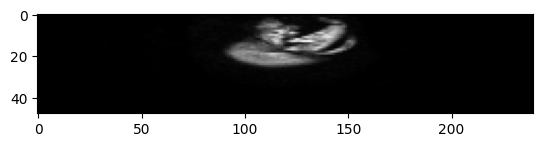

In [12]:
plt.imshow(registered_array[:, :, 40], cmap='gray')




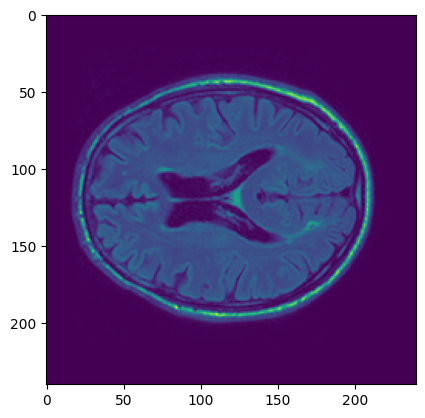

In [28]:
plt.imshow(image_data_FLAIRR[:, :, 24])

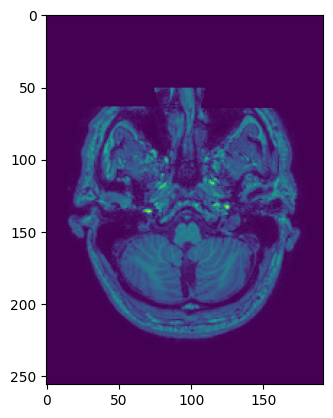

In [30]:
plt.imshow(image_data_T1[:, 150, :])